# Alpha-Beta Community Detection
This is a demonstration of the alpha-beta community detection algorithm. You may use the binder service to run this notebook.



## Preliminaries

Run the following cell to import the required library.

In [2]:
import abcommunity
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for IBFS::IBFSStats already registered; second conversion method ignored.
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for IBFS::IBFSGraph already registered; second conversion method ignored.
  return f(*args, **kwds)


The following are functions that help present the clustering solutions. You can modify them to show the results according to your preferences.

In [21]:
def get_modularity_from_cluster(G, cluster):
    get_id_from_vertex = {}
    for i, v in enumerate(G.nodes):
        get_id_from_vertex[v] = i
    # map node id to index id (the node may not start from zero, continuous from 0 to |N|, e.t.c)
    cluster = [[get_id_from_vertex[v] for v in c] for c in cluster]
    # cluster is a list of list
    B = nx.modularity_matrix(G)
    modularity = 0
    for community in cluster:
        c = list(community)
        modularity += np.sum(B[c][:, c])
    modularity = modularity / (2 * G.number_of_edges())
    return modularity

def print_solution(solution_dict):
    # solution_dict is a dictionary, keys are the tensile strength, values are the corresponding cluster
    for alpha, cluster in sorted(solution_dict.items()):
        print('alpha: ', alpha)
        print('cluster: ', [set(community) for community in cluster])
        print()

## Examples
We can now run the clustering algorithms on some simple examples and compare them with other algorithms.

### A simple graph with a triangle and a line

The following defines a digraph and its undirected counterpart.

In [11]:
D = nx.DiGraph()
D.add_edges_from([(0, 1, {'weight': 1}), 
                   (1, 2, {'weight': 1}), 
                   (2, 0, {'weight': 1}), 
                   (3, 4, {'weight': 1})])
G = D.to_undirected()

#### Alpha-Beta community detection on the digraph

To run the alpha-beta community detection:

In [12]:
abcomm = abcommunity.ABCommunity(G=D, beta=1, weight='weight')
abcomm.fit()

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


To obtain the documentation:

In [6]:
help(abcomm)

Help on GameClustering in module game_clustering.game_clustering object:

class GameClustering(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, G, beta, weight=None, ignore_nodes=set(), find_weaker_cluster=True, n_jobs=1, verbose=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  directed_cut_size(self, S, T=None)
 |  
 |  f_a_b(self, community, alpha)
 |  
 |  f_a_b_seperate(self, community)
 |  
 |  find_a_b_communitites_ibfs(self, j, alpha, ignore_nodes, verbose)
 |  
 |  find_alpha_ps(self, j, ignore_nodes, current_best_y_intercept, verbose, find_first_turning_pt_only=False)
 |  
 |  find_dominate_community(self, ignore_nodes, find_first_turning_pt_only=False)
 |      find_dominate_community
 |      Parameters
 |      -----------
 |      G: a networkx DiGraph
 |      beta: float, [0,1]
 |          the beta value in alpha-beta communities
 |      weight: string, optional
 |          the attribute name of the weight, if not provided, 

To get the clustering solution:

In [10]:
abcomm.solutions

{1.5: {frozenset({3}),
  frozenset({2}),
  frozenset({1}),
  frozenset({4}),
  frozenset({0})},
 0.5: {frozenset({3, 4}), frozenset({0, 1, 2})},
 0.0: {frozenset({0, 1, 2, 3, 4})},
 1.0: {frozenset({3}), frozenset({4}), frozenset({0, 1, 2})}}

We can pretty print the solution using the helper function defined earlier:

In [23]:
print_solution(abcomm.solutions)

alpha:  0.0
cluster:  [{0, 1, 2, 3, 4}]

alpha:  0.5
cluster:  [{3, 4}, {0, 1, 2}]

alpha:  1.0
cluster:  [{3}, {4}, {0, 1, 2}]

alpha:  1.5
cluster:  [{3}, {2}, {1}, {4}, {0}]



## A simple example shown in the paper

In [42]:
D = nx.DiGraph()
D.add_edges_from([(1, 0, {'weight': 2}), 
                   (1, 2, {'weight': 1}), 
                   (2, 1, {'weight': 1})])

In [44]:
abcomm = abcommunity.ABCommunity(G=D, beta=0, weight='weight')
abcomm.fit()
print_solution(abcomm.solutions)

alpha:  0.0
cluster:  [{0}, {1, 2}]

alpha:  1.0
cluster:  [{2}, {1}, {0}]



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


### Ring Of Cliques

In [68]:
G = nx.ring_of_cliques(num_cliques=30, clique_size=5)

In [69]:
abcomm = abcommunity.ABCommunity(G=G, beta=1)
abcomm.fit()

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.7s finished


In [70]:
print_solution(abcomm.solutions)

alpha:  0.0
cluster:  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}]

alpha:  4.4137931
cluster:  [{25, 26, 27, 28, 29}, {55, 56, 57, 58, 59}, {115, 116, 117, 118, 119}, {32, 33, 34, 30, 31}, {100, 101, 102, 103, 104}, {144, 140, 141, 142, 143}, {65, 66, 67, 68, 69}, {20, 21, 22, 23, 24}, {128, 129, 125, 126, 127}, {16, 17, 18, 19, 15}, {70, 71, 72, 73, 74}, {10, 11, 12, 13, 14}, {85, 86, 87, 88, 89},

In [75]:
# greedy modularity
modularity_cluster = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
modularity_cluster

# modularity approach will group 2 consecutive cliques together

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9}),
 frozenset({10, 11, 12, 13, 14, 15, 16, 17, 18, 19}),
 frozenset({20, 21, 22, 23, 24, 25, 26, 27, 28, 29}),
 frozenset({30, 31, 32, 33, 34, 35, 36, 37, 38, 39}),
 frozenset({40, 41, 42, 43, 44, 45, 46, 47, 48, 49}),
 frozenset({50, 51, 52, 53, 54, 55, 56, 57, 58, 59}),
 frozenset({60, 61, 62, 63, 64, 65, 66, 67, 68, 69}),
 frozenset({70, 71, 72, 73, 74, 75, 76, 77, 78, 79}),
 frozenset({80, 81, 82, 83, 84, 85, 86, 87, 88, 89}),
 frozenset({90, 91, 92, 93, 94, 95, 96, 97, 98, 99}),
 frozenset({100, 101, 102, 103, 104, 105, 106, 107, 108, 109}),
 frozenset({110, 111, 112, 113, 114, 115, 116, 117, 118, 119}),
 frozenset({120, 121, 122, 123, 124, 125, 126, 127, 128, 129}),
 frozenset({130, 131, 132, 133, 134, 135, 136, 137, 138, 139}),
 frozenset({140, 141, 142, 143, 144, 145, 146, 147, 148, 149})]

In [76]:
every_clique = get_modularity_from_cluster(G, gc.solutions[3.0937931])
every_two_clique = get_modularity_from_cluster(G, modularity_cluster)
print('Modularity of grouping every clique: ', every_clique)
print('Modularity of grouping every two consecutive clique: ', every_two_clique)
print('Modularity of grouping every two clique is larger than the modularity of grouping every clique: ', every_two_clique>every_clique)

# Modularity is higher if we group two consecutive cluster together, but seperating every clique is desired.

KeyError: 3.0937931

### Web community

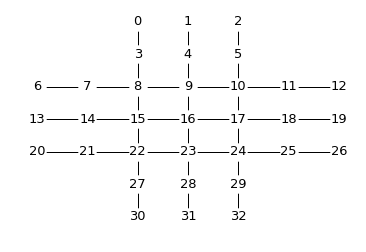

<Figure size 432x288 with 0 Axes>

In [77]:
G = nx.grid_graph([7, 7])
T = G.copy()
for i, j in G.edges:
    if (i[1]==0 and j[1]==0 and T.has_edge(i, j)) or \
        (i[1]==1 and j[1]==1 and T.has_edge(i, j)) or \
        (i[1]==5 and j[1]==5 and T.has_edge(i, j)) or \
        (i[1]==6 and j[1]==6 and T.has_edge(i, j)) or \
        (i[0]==0 and j[0]==0 and T.has_edge(i, j)) or \
        (i[0]==1 and j[0]==1 and T.has_edge(i, j)) or \
        (i[0]==5 and j[0]==5 and T.has_edge(i, j)) or \
        (i[0]==6 and j[0]==6 and T.has_edge(i, j)):
        # remove first column
        T.remove_edge(i, j)
T.remove_node((0,0))
T.remove_node((0,1))
T.remove_node((1,0))
T.remove_node((1,1))

T.remove_node((0,5))
T.remove_node((0,6))
T.remove_node((1,5))
T.remove_node((1,6))
# last column top and bottom
T.remove_node((5,0))
T.remove_node((6,0))
T.remove_node((5,1))
T.remove_node((6,1))

T.remove_node((5,5))
T.remove_node((6,6))
T.remove_node((5,6))
T.remove_node((6,5))
T.number_of_edges()

# add weight
nx.set_edge_attributes(T, 1, 'weight')
web_center_row_column = [2,3,4]
for i, j in T.edges:
    if (i[0] in web_center_row_column) \
    and (i[1] in web_center_row_column) \
    and (j[0] in web_center_row_column) \
    and (j[1] in web_center_row_column):
        T[i][j]['weight'] = 1
# relabel the nodes
k = 0
pos = {}
for node in sorted([i for i in T], key=lambda element: (element[0], -element[1]))[::-1]:
    pos[k] = ([node[1], node[0]])
    T = nx.relabel_nodes(T, {node: k})
    k += 1
G=T.copy()
nx.draw_networkx_labels(G,pos=pos,labels={i:i for i in (G)},font_size=13)
nx.draw(G,pos=pos, node_color='w')
plt.show()
plt.clf()

In [78]:
abcomm = abcommunity.ABCommunity(G=G, beta=0.8)
abcomm.fit()

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


In [23]:
print_solution(abcomm.solutions)

alpha:  0.0
cluster:  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}]

alpha:  1.7
cluster:  [{30}, {8, 9, 10, 15, 16, 17, 22, 23, 24}, {20}, {32}, {13}, {11}, {25}, {14}, {4}, {21}, {26}, {19}, {7}, {5}, {3}, {0}, {6}, {28}, {18}, {1}, {31}, {12}, {29}, {2}, {27}]

alpha:  2.2
cluster:  [{25}, {21}, {26}, {19}, {16}, {22}, {9}, {7}, {5}, {10}, {3}, {0}, {28}, {29}, {2}, {30}, {20}, {32}, {15}, {13}, {11}, {8}, {14}, {23}, {4}, {17}, {6}, {18}, {1}, {31}, {12}, {27}, {24}]



# Web Spider Graph with 2 web center

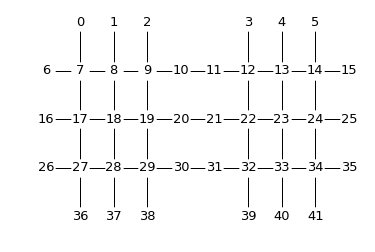

In [25]:
G = nx.grid_graph([10, 5])
T = G.copy()
for i, j in G.edges:
    if (i[1]==0 and j[1]==0) or\
    (i[1]==9 and j[1]==9) or\
    (i[1]==4 and j[1]==4) or\
    (i[1]==5 and j[1]==5) or\
    (i[0]==0 and j[0]==0) or\
    (i[0]==4 and j[0]==4):
        # remove first column
        # remove last column
        # remove middle column
        # remove first row
        # remove last row
        T.remove_edge(i, j)
# first column top and bottom two node
T.remove_node((0,0))
T.remove_node((4,0))
# middle column top and bottom two node
T.remove_node((0,4))
T.remove_node((4,4))
T.remove_node((0,5))
T.remove_node((4,5))
# last column top and bottom two node
T.remove_node((0,9))
T.remove_node((4,9))
T.number_of_edges()

k = 0
pos = {}
for node in sorted([i for i in T], key=lambda element: (element[0], -element[1]))[::-1]:
    pos[k] = ([node[1], node[0]])
    T = nx.relabel_nodes(T, {node: k})
    k += 1
G=T.copy()
labels = {}
nx.draw_networkx_labels(G,pos=pos,labels={i:i for i in (G)},font_size=13)
nx.draw(G,pos=pos, node_color='w')
plt.show()

In [26]:
abcomm = abcommunity.ABCommunity(G=G, beta=0.8)
abcomm.fit()

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished


In [27]:
print_solution(abcomm.solutions)

alpha:  0.0
cluster:  [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41}]

alpha:  1.8
cluster:  [{39}, {37}, {35}, {38}, {15}, {25}, {4}, {26}, {16}, {5}, {3}, {0}, {6}, {40}, {36}, {7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34}, {1}, {2}, {41}]

alpha:  2.15652174
cluster:  [{30}, {39}, {20}, {37}, {35}, {38}, {15}, {11}, {25}, {32, 33, 34, 12, 13, 14, 22, 23, 24}, {4}, {21}, {26}, {16}, {5}, {10}, {3}, {0}, {7, 8, 9, 17, 18, 19, 27, 28, 29}, {6}, {40}, {36}, {1}, {31}, {2}, {41}]

alpha:  2.2
cluster:  [{38}, {25}, {21}, {26}, {19}, {16}, {33}, {22}, {9}, {7}, {5}, {10}, {3}, {0}, {28}, {29}, {2}, {41}, {30}, {39}, {20}, {37}, {35}, {32}, {15}, {13}, {11}, {8}, {14}, {23}, {4}, {34}, {17}, {6}, {18}, {40}, {36}, {1}, {31}, {12}, {27}, {24}]

